In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import TweetTokenizer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import string

In [2]:
data = pd.read_csv('political_social_media.csv',encoding='iso8859_2')

In [3]:
data = data[data.source=='twitter']

In [4]:
data.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'audience', 'audience:confidence', 'bias',
       'bias:confidence', 'message', 'message:confidence', 'orig__golden',
       'audience_gold', 'bias_gold', 'bioid', 'embed', 'id', 'label',
       'message_gold', 'source', 'text'],
      dtype='object')

In [5]:
data.text.values[1]

'VIDEO - #Obamacare:  Full of Higher Costs and Broken Promises: http://t.co/dn3vzqIrWF'

In [6]:
def text_cleanup(tweet):
    tweet = tweet.replace('\x89ŰŞ',"'")
    tweet = tweet.replace('&amp;','&')
    tweet = tweet.replace('\x89Ű_','')
    tweet = tweet.replace('\x89Ű\x9d','')
    tweet = tweet.replace('\x89ŰĎ','')
    tweet = tweet.replace('\x89äĘ','')
    tweet = tweet.replace('\x89Ű\x8f','')
    tweet = tweet.replace('\x89ŰŇ','')
    tweet = tweet.replace('\x89ŰÓ&gt;','')
    tweet = tweet.replace('\x89Ű÷','')
    tweet = tweet.replace("\'","'")
    tweet = tweet.replace("\x89\xa0Ő","")
    tweet = tweet.replace("\x89ŰÓ"," ")
    tweet = tweet.replace("\x89Ű˘\t","")
    tweet = tweet.replace("\x89Ű˘","")    
    return tweet
    

In [7]:
data['text'] = data.text.apply(text_cleanup)

In [8]:
data['is_retweet'] = data.text.apply(lambda x: 1 if x[0:2]=='RT' else 0)
data['is_quote_tweet'] = data.text.apply(lambda x: 1 if ' RT ' in x else 0)

In [9]:
np.sum(data.is_retweet.values) + np.sum(data.is_quote_tweet.values)

206

In [10]:
def tokenize(text):
    twt = TweetTokenizer()
    return twt.tokenize(text)

In [11]:
data['tokens'] = data.text.apply(tokenize)

In [12]:
data.tokens.values[0:100]

array([list(['RT', '@nowthisnews', ':', 'Rep', '.', 'Trey', 'Radel', '(', 'R', '-', '#FL', ')', 'slams', '#Obamacare', '.', '#politics', 'https://t.co/zvywMG8yIH']),
       list(['VIDEO', '-', '#Obamacare', ':', 'Full', 'of', 'Higher', 'Costs', 'and', 'Broken', 'Promises', ':', 'http://t.co/dn3vzqIrWF']),
       list(['Please', 'join', 'me', 'today', 'in', 'remembering', 'our', 'fallen', 'heroes', 'and', 'honoring', 'the', 'men', 'and', 'women', 'currently', 'in', 'military', 'service', 'for', 'their', 'sacrifices', '.']),
       list(['RT', '@SenatorLeahy', ':', '1st', 'step', 'toward', 'Senate', 'debate', 'on', 'Leahy-Crapo', '#VAWA', 'bill', 'is', 'the', "Senate's", 'procedural', 'vote', 'today', 'at', '5:30', 'pm']),
       list(['.', '@amazon', 'delivery', '#drones', 'show', 'need', 'to', 'update', 'law', 'to', 'promote', '#innovation', '&', 'protect', '#privacy', '.', 'My', '#UAS', 'bill', 'does', 'that', ':', 'http://t.co/l9ta5SKq6u']),
       list(['Called', 'on', 'the', '@USDO

In [13]:
grouped_data = data.groupby(by='bioid').agg(' '.join).reset_index()

In [14]:
data['tweet_length'] = data.text.apply(lambda x: len(x))

In [15]:
data['word_count'] = data.tokens.apply(lambda x: len(x))

Text(0,0.5,'Number of Characters')

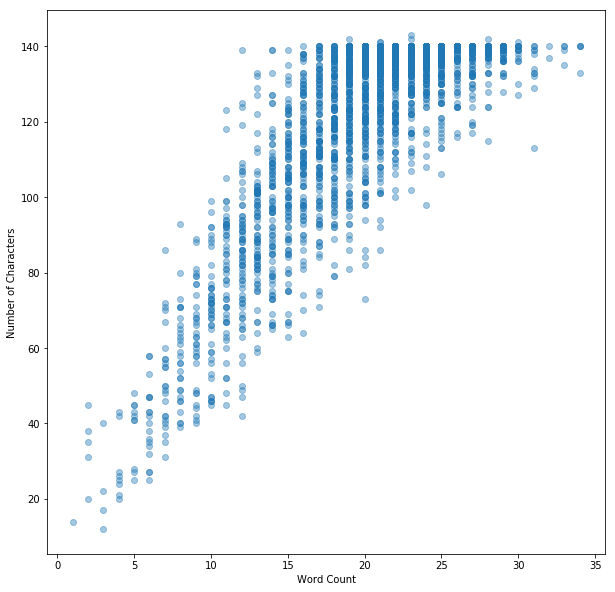

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(data.word_count,data.tweet_length,alpha=0.4)
plt.xlabel('Word Count')
plt.ylabel('Number of Characters')

In [17]:
data.tweet_length.describe()

count    2500.000000
mean      117.991200
std        25.899101
min        12.000000
25%       106.000000
50%       129.000000
75%       138.000000
max       143.000000
Name: tweet_length, dtype: float64

In [18]:
data[data.tweet_length>280]['text'].values[0:50]

array([], dtype=object)

In [19]:
data.tokens.values[0:10]

array([list(['RT', '@nowthisnews', ':', 'Rep', '.', 'Trey', 'Radel', '(', 'R', '-', '#FL', ')', 'slams', '#Obamacare', '.', '#politics', 'https://t.co/zvywMG8yIH']),
       list(['VIDEO', '-', '#Obamacare', ':', 'Full', 'of', 'Higher', 'Costs', 'and', 'Broken', 'Promises', ':', 'http://t.co/dn3vzqIrWF']),
       list(['Please', 'join', 'me', 'today', 'in', 'remembering', 'our', 'fallen', 'heroes', 'and', 'honoring', 'the', 'men', 'and', 'women', 'currently', 'in', 'military', 'service', 'for', 'their', 'sacrifices', '.']),
       list(['RT', '@SenatorLeahy', ':', '1st', 'step', 'toward', 'Senate', 'debate', 'on', 'Leahy-Crapo', '#VAWA', 'bill', 'is', 'the', "Senate's", 'procedural', 'vote', 'today', 'at', '5:30', 'pm']),
       list(['.', '@amazon', 'delivery', '#drones', 'show', 'need', 'to', 'update', 'law', 'to', 'promote', '#innovation', '&', 'protect', '#privacy', '.', 'My', '#UAS', 'bill', 'does', 'that', ':', 'http://t.co/l9ta5SKq6u']),
       list(['Called', 'on', 'the', '@USDO

(array([ 18.,  52., 108., 284., 335., 575., 739., 265., 103.,  21.]),
 array([ 1. ,  4.3,  7.6, 10.9, 14.2, 17.5, 20.8, 24.1, 27.4, 30.7, 34. ]),
 <a list of 10 Patch objects>)

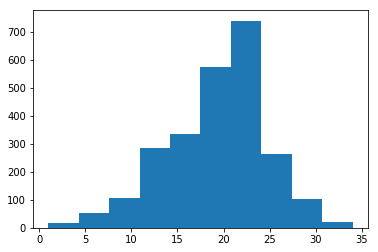

In [20]:
plt.hist(data.word_count)

In [21]:
data[data.is_quote_tweet==1].text.values

array(['We are running late. Heading there now. The mayor VS me. RT @TheClimateHawk we showed up at the showdown.  Watch out for hole 6!',
       "Yes I will! RT @VictoriaFinkle: Crapo also said he'll keep fighting for structural change to CFPB.",
       'Ridiculous RT @PeenyMcNeeny: @RepJeffDuncan Only traitors complain about taxes. #PJNET',
       'Thanks for sharing, have a great #IndependenceDay! RT @adamslane17: @RepSteveStivers watching #musical 1776',
       'Share if you think Texas should #ExpandMedicaidNow  RT http://t.co/OXl7kXcCx4',
       'Partner with me. RT @trademeansjobs: .@RepBoustany on #TPA4USjobs "It is my top priority in the US Congress." .@USChamber .@ChamberGlobal',
       'Yes. RT @themainepain UI vote this week?',
       "Our message to the American people is this: let's get Washington out of the way of how you use #yourtime. Watch & RT http://t.co/VdDIlvIiFz",
       'This is long-overdue, but welcome news. RT @washingtonpost: Panetta removes military ban on 

In [22]:
punc = set(string.punctuation+'‘’…°–—“”')
twt = TweetTokenizer()
def tweet_tokenize(tweet):
    tokens = twt.tokenize(tweet)
    no_punc = [token for token in tokens if (token[0] not in punc)]
    no_links = [token for token in no_punc if token[0:4]!='http']
    return no_links

In [23]:
data['clean_tokens'] = data.text.apply(tweet_tokenize)

In [41]:
data.clean_tokens.values[0:15]

array([list(['RT', 'Rep', 'Trey', 'Radel', 'R', 'slams']),
       list(['VIDEO', 'Full', 'of', 'Higher', 'Costs', 'and', 'Broken', 'Promises']),
       list(['Please', 'join', 'me', 'today', 'in', 'remembering', 'our', 'fallen', 'heroes', 'and', 'honoring', 'the', 'men', 'and', 'women', 'currently', 'in', 'military', 'service', 'for', 'their', 'sacrifices']),
       list(['RT', '1st', 'step', 'toward', 'Senate', 'debate', 'on', 'Leahy-Crapo', 'bill', 'is', 'the', "Senate's", 'procedural', 'vote', 'today', 'at', '5:30', 'pm']),
       list(['delivery', 'show', 'need', 'to', 'update', 'law', 'to', 'promote', 'protect', 'My', 'bill', 'does', 'that']),
       list(['Called', 'on', 'the', 'to', 'release', 'info', 'about', 'inspections', 'before', 'the', 'to', 'review', 'quality', 'of', 'rails', '1/2']),
       list(['help', 'us', 'keep', 'the', 'kidnapped', 'Nigerian', 'school', 'girls', 'story', 'out', 'front']),
       list(['Show', 'your', 'Arizona', 'pride-choose', 'your', 'favorite', '

In [25]:
import gensim

In [26]:
model = gensim.models.KeyedVectors.load_word2vec_format('data/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [27]:
model.wmdistance(data.clean_tokens.values[2], data.clean_tokens.values[3])

2.9337599839190465

In [28]:
model.init_sims(replace=True)  # Normalizes the vectors in the word2vec class.

In [31]:
data.clean_sentences = data.clean_tokens.apply(lambda x: ' '.join(x))
sim_model = gensim.similarities.WmdSimilarity(data.clean_sentences, model, num_best=5 )

In [32]:
example_sentence = data.clean_sentences[2]
print (example_sentence)
sims = sim_model[example_sentence]

Please join me today in remembering our fallen heroes and honoring the men and women currently in military service for their sacrifices


In [40]:
for i in range(5):
    print ('similarity={}'.format(sims[i][1]))
    print (data.clean_sentences[sims[i][0]])
    print (' ')

similarity=1.0
Please join me today in remembering our fallen heroes and honoring the men and women currently in military service for their sacrifices
 
similarity=0.8589593429895833
Ending this evening w prayers for the family of Police Chief Pimentel for the entire community of Elmendorf Their loss is our loss
 
similarity=0.8515244817916235
There are a lot of areas where the government can with little pain inflicted on hardworking Americans
 
similarity=0.8482633518716841
In 2/3 of families with children a woman is either the primary or co-breadwinner so her earnings are vital to their families
 
similarity=0.8460228016581833
Wishing Ginny Hildebrand from the best in retirement and grateful for her 28 years of service
 


In [42]:
example_sentence = data.clean_sentences[10]
print (example_sentence)
sims = sim_model[example_sentence]

As POTUS golfs pushes amnesty ignores Keystone American people are concerned about jobs econ health care costs


In [43]:
for i in range(5):
    print ('similarity={}'.format(sims[i][1]))
    print (data.clean_sentences[sims[i][0]])
    print (' ')

similarity=1.0
As POTUS golfs pushes amnesty ignores Keystone American people are concerned about jobs econ health care costs
 
similarity=0.8399817869472328
POTUS holds end of year presser today We'd ask if ur concerned about jobs 4 middle class why not open Atlantic coast 4 energy
 
similarity=0.8387490565054223
Omw to leadership press conf on actions Congress can take to make sure everyone has a watch here
 
similarity=0.8271471792705777
showcase features industry leaders Happy to welcome Springdale's BioBased Technologies
 
similarity=0.8253559204665686
Thoughts prayers are w the families of the 3 innocent Israeli teens Abbas must denounce terrorism bring those responsible to justice
 
